# This notebook explores RT model data for absorption retrievals.

## Author:  g.mahapatra@tudelft.nl



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Add the file path containing the results for various models.

In [23]:
path = '/Users/gouravmahapatr/Dropbox/PhD/Codes/VenusAbsorptionRetrival/modelresults2/'

# load the aerosols.in file used to create the models.
aerosols = np.loadtxt(path+'aerosols.in')
print('Shape of aerosols:',aerosols.shape)

# load the wavelength points 
wav = np.load(path+'wav.npy')
print('Wavelengths(microns):',wav)

# load the geometries file
geom = np.loadtxt(path+'geos.in',skiprows=4)
print('Shape of Geometries:',geom.shape)
#print(geom)
geomdf = pd.DataFrame(geom,columns=['alpha','theta0','theta','phi','beta'])
geomdf['GeomNum'] = np.arange(len(geom))

# make a dataframe to view the data
columns = ['ScaleHeightModel','CloudWidth(km)','CloudScaleHeight(km)','CloudTopAltitude(km)','CloudOpacity','HazeScaleHeight(km)','HazeOpacity','ProfileNum']
aerosolsdf = pd.DataFrame(aerosols,columns=columns)
aerosolsdf
#geom.head(10)

Shape of aerosols: (105, 8)
Wavelengths(microns): [1.4        1.41944444 1.43       1.44       1.45       1.47      ]
Shape of Geometries: (8281, 5)


,ScaleHeightModel,CloudWidth(km),CloudScaleHeight(km),CloudTopAltitude(km),CloudOpacity,HazeScaleHeight(km),HazeOpacity,ProfileNum
0,1.0,0.0,2.0,60.0,30.0,4.0,0.1,1.0
1,1.0,0.0,2.0,61.0,30.0,4.0,0.1,2.0
2,1.0,0.0,2.0,62.0,30.0,4.0,0.1,3.0
3,1.0,0.0,2.0,63.0,30.0,4.0,0.1,4.0
4,1.0,0.0,2.0,64.0,30.0,4.0,0.1,5.0
...,...,...,...,...,...,...,...,...
100,1.0,0.0,6.0,76.0,30.0,4.0,0.1,102.0
101,1.0,0.0,6.0,77.0,30.0,4.0,0.1,103.0
102,1.0,0.0,6.0,78.0,30.0,4.0,0.1,104.0
103,1.0,0.0,6.0,79.0,30.0,4.0,0.1,105.0


In [24]:
geomdf.index

RangeIndex(start=0, stop=8281, step=1)

### Add the file path containing the results for various models.

Make a loop over all the models and gather them into one array. 

In [25]:
# make an empty list
results = []
for i in range(len(aerosols)):
    try:
        results.append(np.load(path+'kspectra_{:05d}.npy'.format(i)))
    except:
        pass # donothing
# convert into an array 
results = np.array(results)

## Print the shape. The shape should be: 
     [no.of models,no.of geometries,Stokes(I Q U),lambda]

In [26]:
print('Shape =',results.shape)
results[0,0,0,0]

Shape = (105, 8281, 3, 6)


0.8407859407433664

## Make a dataframe containing all the data

In [27]:
# flatten the array
results_flat = []
for i in range(len(results[:,0,0,0])):
    for j in range(len(results[0,:,0,0])):
        for k in range(len(results[0,0,0,:])):
            results_flat.append([i+1,j,wav[k],results[i,j,0,k],results[i,j,1,k],results[i,j,2,k]])
# convert into array
results_flat = np.array(results_flat)
# convert into DataFrame
df = pd.DataFrame(results_flat,columns=['ModelNum','GeomNum','Lambda','F','Q','U'])

# add the degree of polarization column
df['P'] = -df['Q']/df['F']

# modify the lambda into nanometers
df['Lambda'] = np.round(df['Lambda']*1e3)
# convert into int type
df['Lambda'] = df['Lambda'].astype(int)

print('Shape of data:',df.shape)
df


Shape of data: (5217030, 7)


,ModelNum,GeomNum,Lambda,F,Q,U,P
0,1.0,0.0,1400,0.840786,0.000000,0.0,-0.000000
1,1.0,0.0,1419,0.726821,0.000000,0.0,-0.000000
2,1.0,0.0,1430,0.139299,0.000000,0.0,-0.000000
3,1.0,0.0,1440,0.016076,0.000000,0.0,-0.000000
4,1.0,0.0,1450,0.175177,0.000000,0.0,-0.000000
...,...,...,...,...,...,...,...
5217025,105.0,8280.0,1419,9950.234792,354.076659,0.0,-0.035585
5217026,105.0,8280.0,1430,6720.807975,358.374772,0.0,-0.053323
5217027,105.0,8280.0,1440,19990.663155,-4307.004713,0.0,0.215451
5217028,105.0,8280.0,1450,24433.860344,-3052.070527,0.0,0.124912


In [28]:
## Merge the aerosol data into the dataframe
df = pd.merge(df,aerosolsdf,left_on=['ModelNum'],right_on=['ProfileNum'],how='left')
# drop the profileNum column
df = df.drop('ProfileNum',axis=1)
df = df.drop(['ScaleHeightModel','CloudWidth(km)'],axis=1)

# Merge the geometry data into the dataframe
df = pd.merge(df,geomdf,left_on=['GeomNum'],right_on=['GeomNum'],how='left')

# rename some of the columns for convenience
df = df.rename(columns={'CloudScaleHeight(km)':'CSH(km)','CloudTopAltitude(km)':'CTA(km)','CloudOpacity':'CO',
                   'HazeScaleHeight(km)':'HSH(km)','HazeOpacity':'HO'})

df.head(100)

,ModelNum,GeomNum,Lambda,F,Q,U,P,CSH(km),CTA(km),CO,HSH(km),HO,alpha,theta0,theta,phi,beta
0,1.0,0.0,1400,0.840786,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1419,0.726821,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1430,0.139299,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1440,0.016076,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1450,0.175177,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,15.0,1470,0.546192,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,30.0,0.0
96,1.0,16.0,1400,0.840786,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,32.0,0.0
97,1.0,16.0,1419,0.726821,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,32.0,0.0
98,1.0,16.0,1430,0.139299,0.0,0.0,-0.0,2.0,60.0,30.0,4.0,0.1,0.0,0.0,0.0,32.0,0.0


## Here we start the exploration

(91, 3, 85)


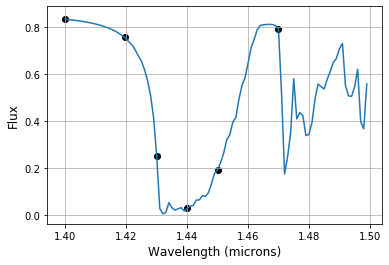

In [29]:
# visualize the wavelengths chosen, on the absorption spectra 
kspectra = np.load('/Users/gouravmahapatr/Dropbox/PhD/Codes/VenusAbsCode/fullKDIS/results/all_models_paper/kspectra_00008.npy')
wav0 = np.load('/Users/gouravmahapatr/Dropbox/PhD/Codes/VenusAbsCode/fullKDIS/results/all_models_paper/wav.npy')
print(kspectra.shape)
plt.plot(wav0,kspectra[30,0,:])
plt.scatter(wav0[0],kspectra[30,0,0],c='k')
plt.scatter(wav0[7],kspectra[30,0,7],c='k')
plt.scatter(wav0[15],kspectra[30,0,15],c='k')
plt.scatter(wav0[25],kspectra[30,0,25],c='k')
plt.scatter(wav0[35],kspectra[30,0,35],c='k')
plt.scatter(wav0[55],kspectra[30,0,55],c='k')
plt.xlabel('Wavelength (microns)',fontsize='large')
plt.ylabel('Flux',fontsize='large')
plt.grid()
#print(wav0)

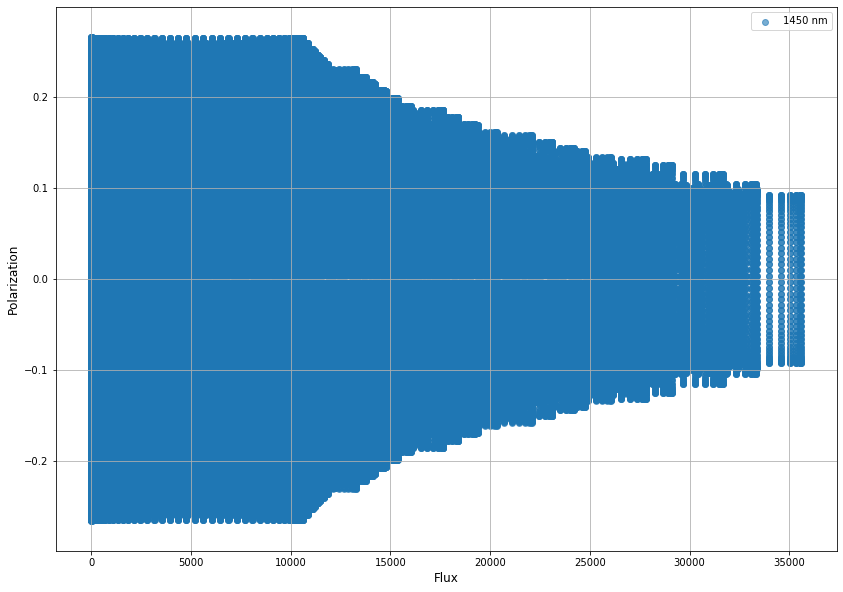

In [30]:
plt.figure(figsize=[14,10])
#plt.scatter(df[df['Lambda']==1400]['F'],df[df['Lambda']==1400]['P'],label='1400 nm')
#plt.scatter(df[df['Lambda']==1425]['F'],df[df['Lambda']==1425]['P'],label='1425 nm')
#plt.scatter(df[df['Lambda']==1435]['F'],df[df['Lambda']==1435]['P'],label='1435 nm',alpha=0.8)
plt.scatter(df[df['Lambda']==1450]['F'],df[df['Lambda']==1450]['P'],label='1450 nm',alpha=0.6)
#plt.scatter(df[df['Lambda']==1445]['F'],df[df['Lambda']==1445]['P'],label='1445 nm',alpha=0.4)
#plt.scatter(df[df['Lambda']==1455]['F'],df[df['Lambda']==1455]['P'],label='1455 nm',alpha=0.2)
plt.xlabel('Flux',fontsize='large')
plt.ylabel('Polarization',fontsize='large')
plt.legend()
plt.grid()

In [31]:
# visulaise the dataset with cloud top variation
df[(df['CTA(km)']==65.0)&(df['theta0']==60)]['Q']

264810     0.005720
264811     0.005270
264812     0.001871
264813    -0.000157
264814     0.003067
             ...   
4488661    0.005252
4488662    0.001875
4488663    0.000163
4488664    0.002871
4488665    0.003457
Name: Q, Length: 2730, dtype: float64

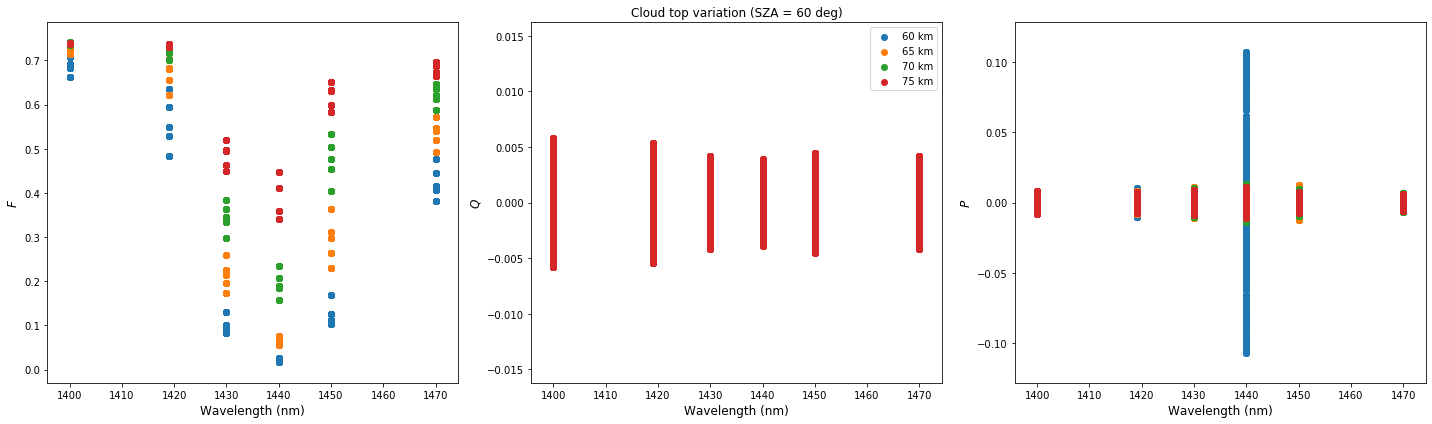

In [32]:
# plot all the wavelength data at specific cloud tops 
%matplotlib inline
sza = 60
plt.figure(figsize=[20,6])
plt.subplot(131)
idx = (df['CTA(km)']==60.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='60 km')
idx = (df['CTA(km)']==65.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='65 km')
idx = (df['CTA(km)']==70.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='70 km')
idx = (df['CTA(km)']==75.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='75 km')
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$F$',fontsize='large')

plt.subplot(132)
plt.title('Cloud top variation (SZA = {:02d} deg)'.format(sza))
idx = (df['CTA(km)']==60.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='60 km')
idx = (df['CTA(km)']==65.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='65 km')
idx = (df['CTA(km)']==70.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='70 km')
idx = (df['CTA(km)']==75.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='75 km')
#plt.ylim([0.004,0.0055])
plt.legend()
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$Q$',fontsize='large')

plt.subplot(133)
idx = (df['CTA(km)']==60.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='60 km')
idx = (df['CTA(km)']==65.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='65 km')
idx = (df['CTA(km)']==70.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='70 km')
idx = (df['CTA(km)']==75.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='75 km')
#plt.ylim([-0.0075,-0.005])
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$P$',fontsize='large')
#plt.show()
plt.tight_layout()

In [33]:
# visulaise the dataset with cloud scale height variation
df[(df['CSH(km)']==4.0)&(df['theta0']==60)]

,ModelNum,GeomNum,Lambda,F,Q,U,P,CSH(km),CTA(km),CO,HSH(km),HO,alpha,theta0,theta,phi,beta
2103192,43.0,2730.0,1400,0.692073,0.005476,0.0,-0.007912,4.0,60.0,30.0,4.0,0.1,0.0,60.0,0.0,0.0,0.0
2103193,43.0,2730.0,1419,0.549399,0.004843,0.0,-0.008815,4.0,60.0,30.0,4.0,0.1,0.0,60.0,0.0,0.0,0.0
2103194,43.0,2730.0,1430,0.084910,0.000137,0.0,-0.001610,4.0,60.0,30.0,4.0,0.1,0.0,60.0,0.0,0.0,0.0
2103195,43.0,2730.0,1440,0.018525,-0.001585,0.0,0.085538,4.0,60.0,30.0,4.0,0.1,0.0,60.0,0.0,0.0,0.0
2103196,43.0,2730.0,1450,0.104150,0.000540,0.0,-0.005183,4.0,60.0,30.0,4.0,0.1,0.0,60.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147139,64.0,2820.0,1419,0.502111,0.004793,0.0,-0.009545,4.0,80.0,30.0,4.0,0.1,0.0,60.0,0.0,180.0,0.0
3147140,64.0,2820.0,1430,0.077244,0.000099,0.0,-0.001277,4.0,80.0,30.0,4.0,0.1,0.0,60.0,0.0,180.0,0.0
3147141,64.0,2820.0,1440,0.021219,-0.001502,0.0,0.070767,4.0,80.0,30.0,4.0,0.1,0.0,60.0,0.0,180.0,0.0
3147142,64.0,2820.0,1450,0.095020,0.000500,0.0,-0.005266,4.0,80.0,30.0,4.0,0.1,0.0,60.0,0.0,180.0,0.0


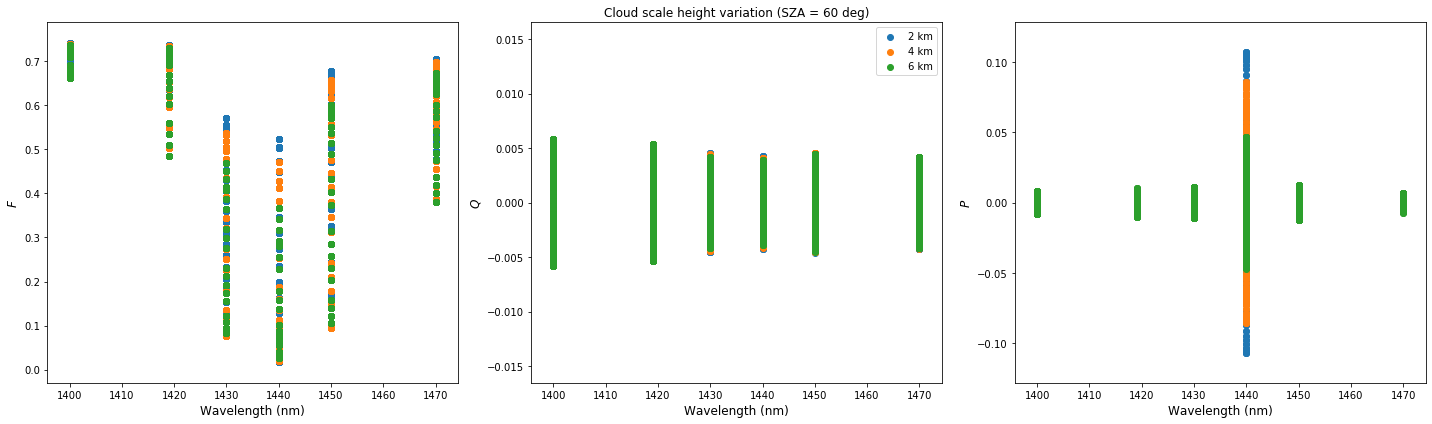

In [34]:
# plot all the wavelength data at specific cloud scale heights 
%matplotlib inline
sza = 60
plt.figure(figsize=[20,6])
plt.subplot(131)
idx = (df['CSH(km)']==2.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='2 km')
idx = (df['CSH(km)']==4.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='4 km')
idx = (df['CSH(km)']==6.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['F'],label='6 km')
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$F$',fontsize='large')

plt.subplot(132)
plt.title('Cloud scale height variation (SZA = {:02d} deg)'.format(sza))
idx = (df['CSH(km)']==2.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='2 km')
idx = (df['CSH(km)']==4.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='4 km')
idx = (df['CSH(km)']==6.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['Q'],label='6 km')
#plt.ylim([0.004,0.0055])
plt.legend()
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$Q$',fontsize='large')

plt.subplot(133)
idx = (df['CSH(km)']==2.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='2 km')
idx = (df['CSH(km)']==4.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='4 km')
idx = (df['CSH(km)']==6.0)&(df['theta0']==sza)
plt.scatter(df[idx]['Lambda'],df[idx]['P'],label='6 km')
#plt.ylim([-0.0075,-0.005])
plt.xlabel('Wavelength (nm)',fontsize='large')
plt.ylabel('$P$',fontsize='large')
#plt.show()
plt.tight_layout()

In [35]:
df[df['P']>0]

,ModelNum,GeomNum,Lambda,F,Q,U,P,CSH(km),CTA(km),CO,HSH(km),HO,alpha,theta0,theta,phi,beta
684,1.0,114.0,1400,0.840475,-0.000012,0.000356,0.000015,2.0,60.0,30.0,4.0,0.1,0.0,2.0,0.0,46.0,0.0
685,1.0,114.0,1419,0.726551,-0.000012,0.000338,0.000016,2.0,60.0,30.0,4.0,0.1,0.0,2.0,0.0,46.0,0.0
686,1.0,114.0,1430,0.139170,-0.000006,0.000176,0.000044,2.0,60.0,30.0,4.0,0.1,0.0,2.0,0.0,46.0,0.0
687,1.0,114.0,1440,0.016002,-0.000003,0.000082,0.000179,2.0,60.0,30.0,4.0,0.1,0.0,2.0,0.0,46.0,0.0
688,1.0,114.0,1450,0.175017,-0.000008,0.000231,0.000046,2.0,60.0,30.0,4.0,0.1,0.0,2.0,0.0,46.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217022,105.0,8279.0,1450,24433.860344,-3044.635829,212.901678,0.124607,6.0,79.0,30.0,4.0,0.1,0.0,180.0,0.0,178.0,0.0
5217023,105.0,8279.0,1470,10709.294037,-103.631618,7.246629,0.009677,6.0,79.0,30.0,4.0,0.1,0.0,180.0,0.0,178.0,0.0
5217027,105.0,8280.0,1440,19990.663155,-4307.004713,0.000000,0.215451,6.0,79.0,30.0,4.0,0.1,0.0,180.0,0.0,180.0,0.0
5217028,105.0,8280.0,1450,24433.860344,-3052.070527,0.000000,0.124912,6.0,79.0,30.0,4.0,0.1,0.0,180.0,0.0,180.0,0.0


In [37]:
df.to_csv('../outputs/RetrievalModelData.csv')